In [21]:
pip install ultralytics

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
import cv2
from ultralytics import YOLO
#import numpy as np
import matplotlib.pyplot as plt


In [17]:
model = YOLO("best2.pt")

In [18]:
# Path to your test image (change this to your own image path)
image_path = "shoes.jpg"

# Run detection
results = model(image_path, conf=0.2)  # confidence threshold 50%

# results[0] contains detections for the first (and only) image
results[0].show()   # OpenCV popup (if supported)


image 1/1 c:\Users\angelika\OneDrive\Documents\GitHub\dspCPE4A2526\dspPython\shoes.jpg: 416x640 6 Shoes, 825.1ms
Speed: 9.0ms preprocess, 825.1ms inference, 20.7ms postprocess per image at shape (1, 3, 416, 640)


In [22]:
# Path to your image
image_path = "shoes.jpg"

# Run detection
results = model(image_path, conf=0.25)


boxes = results[0].boxes
names = model.names  


shoe_boxes = []
for box in boxes:
    cls = int(box.cls[0])
    if names[cls].lower() == "shoe":   
        shoe_boxes.append(box)

print(f"Detected {len(shoe_boxes)} shoe(s).")



image 1/1 c:\Users\angelika\OneDrive\Documents\GitHub\dspCPE4A2526\dspPython\shoes.jpg: 416x640 6 Shoes, 651.1ms
Speed: 3.2ms preprocess, 651.1ms inference, 2.2ms postprocess per image at shape (1, 3, 416, 640)
Detected 6 shoe(s).


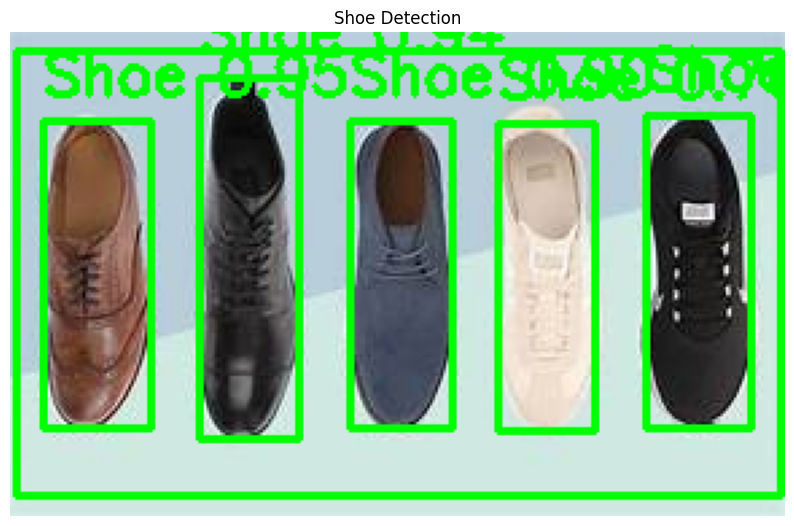

In [ ]:
import cv2
import matplotlib.pyplot as plt


img = cv2.imread(image_path)


for box in boxes:
    cls = int(box.cls[0])
    if names[cls].lower() == "shoe":  
        x1, y1, x2, y2 = box.xyxy[0].cpu().numpy()
        conf = float(box.conf[0])
        label = f"Shoe {conf:.2f}"

        cv2.rectangle(img, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)
        cv2.putText(img, label, (int(x1), int(y1) - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)


img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


plt.figure(figsize=(10, 8))
plt.imshow(img_rgb)
plt.axis("off")
plt.title("Shoe Detection")
plt.show()
